In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import numpy as np
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
files = glob.glob('../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun/*.txt')
files

#here is where the output will go 
path2 = '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun.csv'
files

['../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\000_nm_pre_Absorbance_15-49-48-140.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\000_nm_pre_Absorbance_15-50-08-306.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\000_nm_pre_Absorbance_15-50-11-183.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\010_nm_pre_Absorbance_15-51-17-458.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\020_nm_pre_Absorbance_15-54-21-989.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\020_nm_pre_Absorbance_15-54-36-454.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\050_nm_pre_Absorbance_15-58-56-708.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\100_nm_pre_Absorbance_15-56-49-890.txt',
 '../../../Data_Thesis/Iron/WC_FeT_Rerun/Iron_2214_15_16_17_18_rerun\\200_nm_pre_Absorbance_16-00-49-103.txt',
 

In [3]:
def GET_DATA(name):
    df = pd.read_csv(name, skiprows=15, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']
    #df['wl'] = df['wl']
    #bcorr = df[(df['wl']>=700) & (df['wl']<=701)]['abs'].mean() # a float corection with just 700 nm 
    bcorr = df[(df['wl']>=700) & (df['wl']<=750)]['abs'].mean() # a float corection with 700 to 750 nm 
    df['abs'] = df['abs'] - bcorr
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [4]:
frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function 
    ID = f.split("\\")[1] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 
df['wl'] = df.index
df

,000_nm_pre_Absorbance_15-49-48-140.txt,000_nm_pre_Absorbance_15-50-08-306.txt,000_nm_pre_Absorbance_15-50-11-183.txt,010_nm_pre_Absorbance_15-51-17-458.txt,020_nm_pre_Absorbance_15-54-21-989.txt,020_nm_pre_Absorbance_15-54-36-454.txt,050_nm_pre_Absorbance_15-58-56-708.txt,100_nm_pre_Absorbance_15-56-49-890.txt,200_nm_pre_Absorbance_16-00-49-103.txt,200_nm_pre_Absorbance_16-00-51-981.txt,wl
wl,,,,,,,,,,,
189,0.002930,-3.326158,0.003577,-19.744317,0.002646,3.216039,6.782739,-0.271029,-7.824776,0.003203,189
190,0.002930,-0.059670,0.003577,-2.234443,0.002646,-0.730858,-1.542874,-0.087192,-0.145885,0.003203,190
191,0.067804,-0.038143,0.022166,-0.030702,0.092696,-0.023715,0.197277,0.144824,0.097455,0.315528,191
192,1.094309,0.124869,0.003577,0.437424,-0.006087,0.318692,-0.140812,0.353464,0.002455,1.593657,192
193,-0.537016,0.003432,0.003577,-0.045340,-0.137898,-0.747061,0.004877,-0.220400,-0.972782,0.003203,193
...,...,...,...,...,...,...,...,...,...,...,...
876,0.003431,-0.000354,0.006118,0.011573,0.004787,0.014056,0.020991,0.043309,0.027060,0.025924,876
877,0.018897,0.000524,0.006565,0.013210,0.016245,0.036592,0.027158,0.042469,0.039972,0.019885,877
878,-0.017264,-0.011878,0.003945,-0.010382,-0.009752,0.005601,-0.001792,0.030096,0.021743,0.022703,878


In [5]:
#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=7).str[0]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df['wl'] = df.index
df

,000,010,020,050,100,200,wl
wl,,,,,,,
189,-1.106550,-19.744317,1.609342,6.782739,-0.271029,-3.910786,189
190,-0.017721,-2.234443,-0.364106,-1.542874,-0.087192,-0.071341,190
191,0.017276,-0.030702,0.034490,0.197277,0.144824,0.206492,191
192,0.407585,0.437424,0.156303,-0.140812,0.353464,0.798056,192
193,-0.176669,-0.045340,-0.442479,0.004877,-0.220400,-0.484789,193
...,...,...,...,...,...,...,...
876,0.003065,0.011573,0.009422,0.020991,0.043309,0.026492,876
877,0.008662,0.013210,0.026419,0.027158,0.042469,0.029929,877
878,-0.008399,-0.010382,-0.002076,-0.001792,0.030096,0.022223,878


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

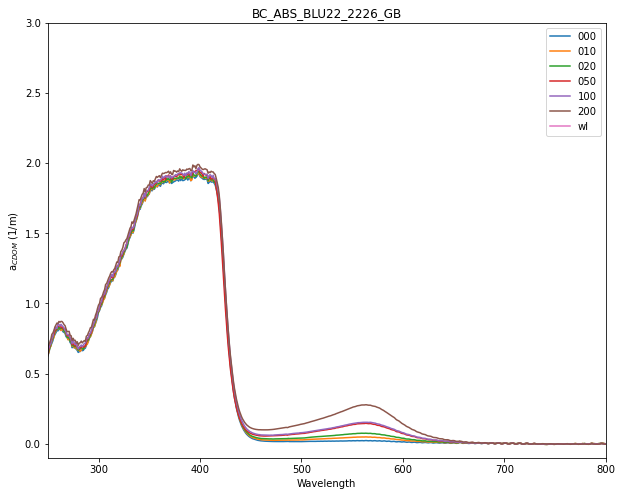

In [6]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-.1,3)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")


In [7]:
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    
    abs_562 = df[(df['wl']==562)][col].mean()
    
    ydata = df[(df['wl']>=450) & (df['wl']<=700)][col]
    xdata = df[(df['wl']>=450) & (df['wl']<=700)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    inter = scipy.integrate.simps(ydata, x=xdata, even='avg')
    
    dict = {'sample':[columnName],
        'abs_562':[abs_562], 
        'intagration':[inter],}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')
ss_outs.to_csv(path2)

ss_outs['conc'] = ss_outs.index.astype(int)
ss_outs

,abs_562,intagration,conc
sample,,,
000,0.021702,3.457583,0
010,0.048151,6.289595,10
020,0.074585,9.199727,20
050,0.144334,16.361360,50
100,0.153109,17.560512,100
200,0.276606,30.836773,200


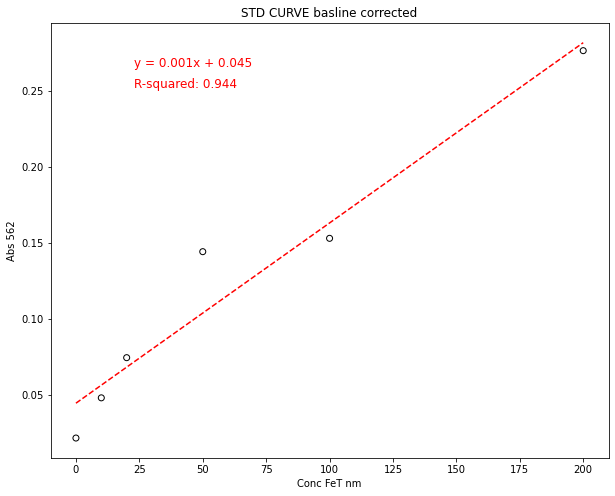

In [8]:
# create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ss_outs['conc'], ss_outs['abs_562'], facecolor='none', edgecolor='black')

# add linear regression line
x = ss_outs['conc']
y = ss_outs['abs_562']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')

# calculate R-squared
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# set x and y labels and title
ax.set_xlabel('Conc FeT nm')
ax.set_ylabel('Abs 562')
ax.set_title('STD CURVE basline corrected')

# print equation of line and R-squared on graph
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=12, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=12, color='red')

# show plot
plt.show()


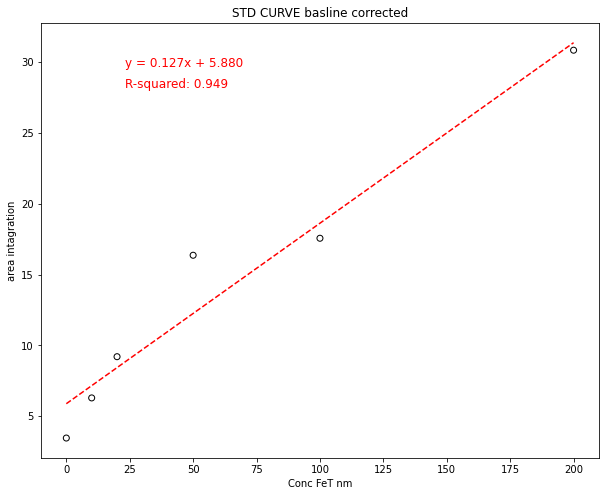

In [9]:
# create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ss_outs['conc'], ss_outs['intagration'], facecolor='none', edgecolor='black')

# add linear regression line
x = ss_outs['conc']
y = ss_outs['intagration']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')

# calculate R-squared
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# set x and y labels and title
ax.set_xlabel('Conc FeT nm')
ax.set_ylabel('area intagration')
ax.set_title('STD CURVE basline corrected')

# print equation of line and R-squared on graph
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=12, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=12, color='red')

# show plot
plt.show()

EXPERIMENTAL